In [ ]:
# CUSTOMER SEGMENTATION PREDICTION PROJECT - Dataset: Mall Customers

In [ ]:
# Grouping customers based on Spending patterns and Purchase behaviours.
# A Mall seeking to gain insights about their customers.
# Build a system that can cluster customers into different groups
# Groups: that pruchase more, others that purchase not so much etc...
# Info from above groupings will help MALL MGT. make better decisions and marketing strategies

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split features into Training and Test
from sklearn.cluster import KMeans # importing the KMeans Clustering Algorithm
#from sklearn.metrics import accuracy_score # this is for model evaluation; to know how many correct predictions were made

In [5]:
# Collecion of Data
cust_df = pd.read_csv('Mall_Customers.csv')
cust_df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# Commence Data Analysis:
# Find the total number of Data points
cust_df.shape

(200, 5)

In [7]:
# Any missing values?
cust_df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

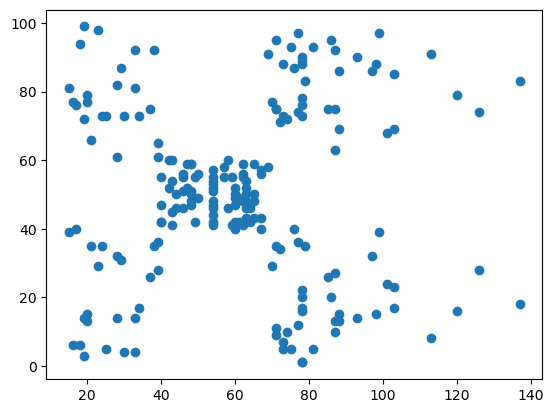

In [10]:
# Customers will be clustered based on "spending score" & "annual income".
# Create a scater plot to view proprosed cluster spread
plt.scatter(cust_df.annual_income, cust_df.spending_score) # from what can be seen I could hazard a guess of 5 clusters!!

In [11]:
# choose the correct number of clusters
# We will use SSE - Sum of Squared Errors
# the ELBOW - Method
# SSE values willl be returned as we loop through different number of clusters - k
# We'll then select the cluster that returns the "minimum SSE value"
# That's what the ELBOW METHOD is all about!

k_rng = range(1,11) # We looping through a range of values to land our k(number of clusters)
sse = [] # to hold th SSE values generated per loop fro the km.inertia_

for k in k_rng:
    # Load the KMeans cluster model into a variable
    km = KMeans(n_clusters = k, random_state = 25)
    # fit KMeans to our data
    km.fit(cust_df[['annual_income', 'spending_score']])
    #.inertia_ will give us the SSE values
    sse.append(km.inertia_)
    
sse

C:\Users\Papirozy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Papirozy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Papirozy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Papirozy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25095.70320999756,
 21850.165282585636,
 19646.482018947238]

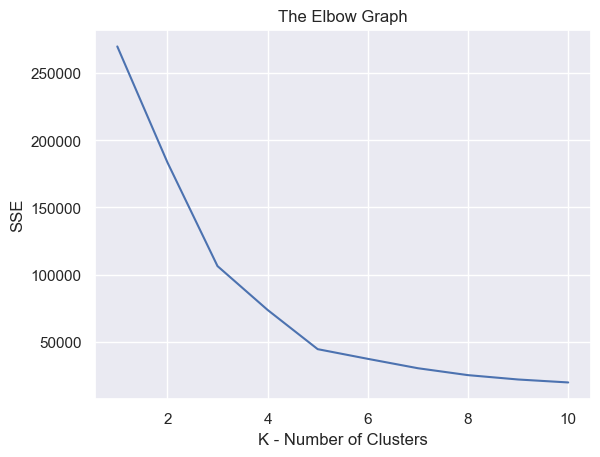

In [13]:
# Plot an ELBOW graph that will expose the Number of Clusters with the Minimum SSE value
# Plot an elbow graph
sns.set()
plt.plot(k_rng, sse)
plt.title('The Elbow Graph')
plt.xlabel('K - Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# We can identify TWO elbow points on this graph that showed drop in SSE values.
# AT K =3 | K = 5
# K = 5 is the OPTIMUM number of clusters, 
# cos afterwards there is no other significant drop in SSE value

In [16]:
# Training our Model to predict clusters for each data point.
# We will be specifying the number of clusters derived from the Elbow graph above.
# 5 Clusters have been confirmed!!!
# Now, let's fit_predict()

km = KMeans(n_clusters = 5, random_state = 0)
km

training_prediction = km.fit_predict(cust_df[['annual_income','spending_score']])
training_prediction

C:\Users\Papirozy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Papirozy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [17]:
# The training_prediction values represent CLUSTERS,
# Append the above predicted values into a new column of your dataframe
cust_df['cluster'] = training_prediction
cust_df

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


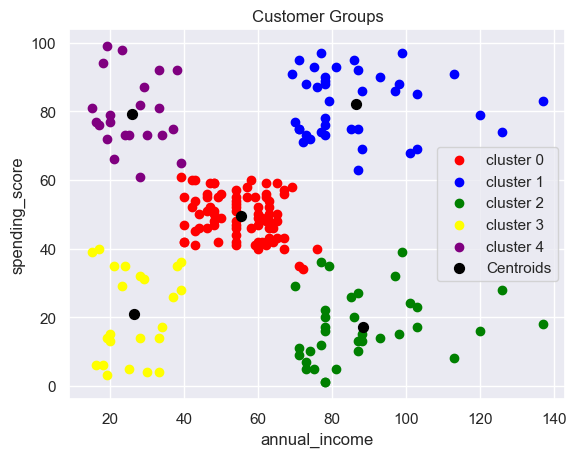

In [24]:
# After successfully infusing our new column into the data frame
# create a scatter plot to accommodate all 5 clusters
# this means we would be creating 5 dataframes (1 per cluster)
cust_df0 = cust_df[cust_df.cluster == 0]
cust_df1 = cust_df[cust_df.cluster == 1]
cust_df2 = cust_df[cust_df.cluster == 2]
cust_df3 = cust_df[cust_df.cluster == 3]
cust_df4 = cust_df[cust_df.cluster == 4]

#Afterwards, lets plot
plt.scatter(cust_df0.annual_income, cust_df0.spending_score, color='red',label='cluster 0')
plt.scatter(cust_df1.annual_income, cust_df1.spending_score, color='blue', label='cluster 1')
plt.scatter(cust_df2.annual_income, cust_df2.spending_score, color='green', label='cluster 2')
plt.scatter(cust_df3.annual_income, cust_df3.spending_score, color='yellow', label='cluster 3')
plt.scatter(cust_df4.annual_income, cust_df4.spending_score, color='purple', label='cluster 4')

# Adding centroids for each cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.legend()

In [ ]:
# Amazing Data Visualization that displays our datasets 5 groups of customers.
# cluster 4 (Purple) - Don't have high income; but are high spenders!
# cluster 3 (Yellow) - Low Income, low Spenders
# cluster 0 (Red) - Average Income, Average Spenders
# cluster 1 (Blue) - High Income, High Spenders
# cluster 2 (Green) - High Income, Low Spenders

In [ ]:
# How can individual customers be identified?
# They have been uniquely identified with the customer ID, along with the cluster value.
# A Simple query will produce each customer and the Mall MGT. can decide what marketing strategies to deploy.

# From the business insights gotten from clustering, bespoke offers can be made to each category/cluster:
# YELLOW - can be made offers, since they earn low and do not spend much.
# GREEN - more offers and discounts can make them buy more, since they earn more